# This is the code file of Brain Tumor Detecton using ANN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# --- 1. Load Data and Define Features/Target ---
df = pd.read_csv("Brain Tumor.csv")

# Features (X) are the image characteristics, Target (y) is the Class (0 or 1)
features = ['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness',
            'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
            'Dissimilarity', 'Correlation', 'Coarseness']
X = df[features]
y = df['Class']

# --- 2. Train-Test Split ---
# 80% for training, 20% for testing (stratify=y ensures balanced classes in both sets)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3. Feature Scaling (Standardization) ---
# ANN models perform best when input features are standardized
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

In [ ]:
# --- 4. Build the ANN Model ---
model = Sequential([
    # Input layer and first hidden layer: 64 neurons
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),

    # Second hidden layer: 32 neurons
    Dense(32, activation='relu'),

    # Output layer: 1 neuron with sigmoid for binary classification
    Dense(1, activation='sigmoid')
])

# --- 5. Compile the Model ---
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', # Appropriate for binary classification
    metrics=['accuracy']
)

# Display the model summary
print(model.summary())

# --- 6. Train the Model ---
print("\nStarting model training...")
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,         # Number of training iterations
    batch_size=32,     # Number of samples per gradient update
    validation_data=(X_test_scaled, y_test),
    verbose=1          # Show training progress
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

None

Starting model training...
Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7834 - loss: 0.5045 - val_accuracy: 0.9827 - val_loss: 0.0847
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9755 - loss: 0.0860 - val_accuracy: 0.9880 - val_loss: 0.0435
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9779 - loss: 0.0676 - val_accuracy: 0.9894 - val_loss: 0.0362
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9862 - loss: 0.0468 - val_accuracy: 0.9894 - val_loss: 0.0315
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9872 - loss: 0.0439 - val_accuracy: 0.9880 - val_loss: 0.0350
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9810 - loss: 0.0496 - val_accuracy: 0.9920 - val_loss: 0.0285
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9821 - loss: 0.0478 - val_accuracy: 0.9920 - val_loss: 0.0279
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9841 - loss: 0.04

# Evaluation and Visualization


Model Evaluation on Test Set:
Test Loss: 0.0248
Test Accuracy: 99.34%
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Sample Predictions:
   Actual_Class  Predicted_Class  Prediction_Probability
0             0                0                0.000678
1             0                0                0.000072
2             0                0                0.000208
3             0                0                0.000122
4             0                0                0.000786
5             0                0                0.008851
6             1                1                1.000000
7             0                0                0.000025
8             1                1                1.000000
9             0                0                0.000128


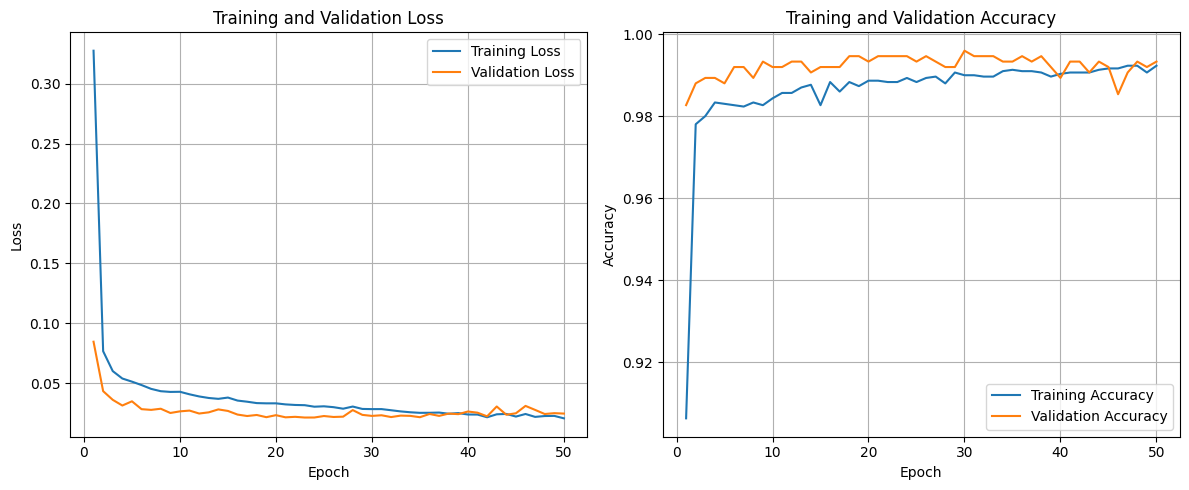

In [ ]:
# --- 7. Evaluate the Model ---
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"\nModel Evaluation on Test Set:")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

# --- 8. Predict and Display Sample Predictions (Optional) ---
import numpy as np
# Get probability predictions
y_pred_proba = model.predict(X_test_scaled)
# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_proba > 0.5).astype(int)

print("\nSample Predictions:")
# Create a DataFrame for easy viewing
sample_df = pd.DataFrame({
    'Actual_Class': y_test.values[:10],
    'Predicted_Class': y_pred[:10].flatten(),
    'Prediction_Probability': y_pred_proba[:10].flatten()
})
print(sample_df)


# --- 9. Plot Training History ---
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show() # Display the plots

# Prediction and detection

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib # Used to save and load the scaler

# --- 1. MODEL TRAINING AND SCALER FITTING (Development Phase) ---

# Load the dataset
df = pd.read_csv("Brain Tumor.csv")

# Define Features (Must be in this exact order for prediction later)
features = ['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness',
            'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
            'Dissimilarity', 'Correlation', 'Coarseness']
X = df[features]
y = df['Class']

# Split for fitting the scaler (best practice is to fit only on training data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and FIT the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(X_train) # The scaler is now ready to transform new data

# Build and Compile the Model (Same architecture as before)
model = Sequential([
    Dense(64, activation='relu', input_shape=(len(features),)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on scaled training data
X_train_scaled = scaler.transform(X_train)
print("Training the ANN model...")
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
print("Training complete. Model is ready for use.")


# --- 2. SINGLE DATA POINT PREDICTION (User Input Phase) ---

# 🚨 EDIT THIS LINE: The user provides their single data point here.
# The 13 values must correspond to the features list above.
new_data_point_values = [
    7.34,      # Mean
    1140.0,    # Variance
    33.80,     # Standard Deviation
    0.001,     # Entropy
    5.06,      # Skewness
    26.47,     # Kurtosis
    81.86,     # Contrast
    0.03,      # Energy
    0.001,     # ASM
    0.26,      # Homogeneity
    5.98,      # Dissimilarity
    0.978,     # Correlation
    7.45834073119875e-155 # Coarseness
]

# Convert the list to a DataFrame (1 row)
X_new = pd.DataFrame([new_data_point_values], columns=features)

# SCALING: Transform the new data using the fitted scaler
# This is mandatory! The model only understands scaled inputs.
X_new_scaled = scaler.transform(X_new)

# Make Prediction on the scaled data
prediction_proba = model.predict(X_new_scaled)[0][0]

# Convert probability to a binary class (0 or 1)
predicted_class = (prediction_proba > 0.5).astype(int)

# --- 3. OUTPUT RESULTS ---
print("\n" + "="*50)
print("           PREDICTION RESULT")
print("="*50)
print(f"Input Data (First 5 values): {new_data_point_values[:5]}...")
print("-" * 50)
print(f"Prediction Probability: {prediction_proba:.4f}")

if predicted_class == 1:
    print(f"Predicted Class: 1 (Tumor Detected) 🚨")
    print("The model suggests the features are consistent with a brain tumor.")
else:
    print(f"Predicted Class: 0 (No Tumor) ✅")
    print("The model suggests the features are not consistent with a brain tumor.")

print("="*50)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the ANN model...
Training complete. Model is ready for use.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

           PREDICTION RESULT
Input Data (First 5 values): [7.34, 1140.0, 33.8, 0.001, 5.06]...
--------------------------------------------------
Prediction Probability: 1.0000
Predicted Class: 1 (Tumor Detected) 🚨
The model suggests the features are consistent with a brain tumor.
